In [ ]:
#Import functions

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create
#import dataset to use
df = pd.read_csv("movies 2.csv")


In [ ]:
# check data imported
#Top five rows of the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#check for missing data
for col in df.columns:
  percentage_missing = np.mean(df[col].isnull())
  print('{} -{}%'.format(col,percentage_missing))

name -0.0%
rating -0.010041731872717789%
genre -0.0%
year -0.0%
released -0.0002608242044861763%
score -0.0003912363067292645%
votes -0.0003912363067292645%
director -0.0%
writer -0.0003912363067292645%
star -0.00013041210224308815%
country -0.0003912363067292645%
budget -0.2831246739697444%
gross -0.02464788732394366%
company -0.002217005738132499%
runtime -0.0005216484089723526%


In [ ]:
#data types for each column
df.dtypes


,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [ ]:
#changing budget,gross and votes from float to integer
#fill the missing values in the column with 0
df[['budget', 'gross', 'votes']] = df[['budget', 'gross', 'votes']].fillna(0).astype('int64')


In [ ]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [ ]:
#there are some years that are not alligned with the released year
#create another column with yearcorrect

df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')
df.head(4)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980


In [ ]:
#arranging the gross in assending order,top to bottom
df.sort_values(by=['gross'],inplace=False,ascending=False)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# for easy scroling
pd.set_option('display.max_rows',None)

In [ ]:
#drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)
#all values are distinct and no duplicate values to drop

,company
7129,thefyzz
5664,micro_scope
6412,iDeal Partners Film Fund
4007,i5 Films
6793,i am OTHER
6420,erbp
3776,double A Films
524,Zupnik-Curtis Enterprises
3330,Zucker Brothers Productions
146,Zoetrope Studios


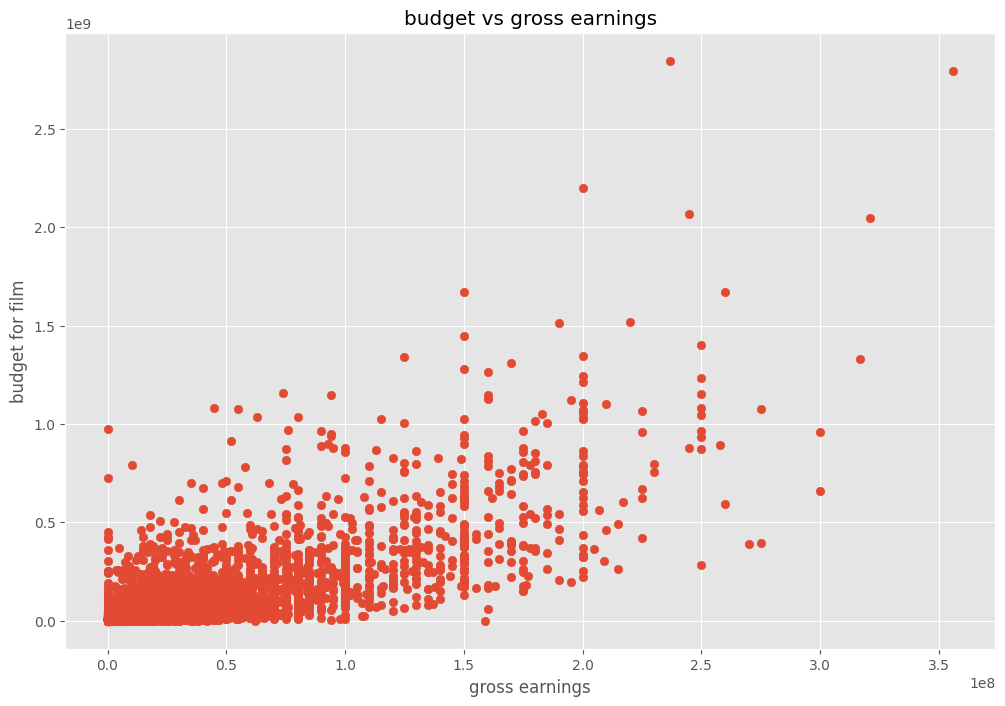

In [ ]:
#budget vs gross earnings
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('budget vs gross earnings')

plt.xlabel('gross earnings')

plt.ylabel('budget for film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

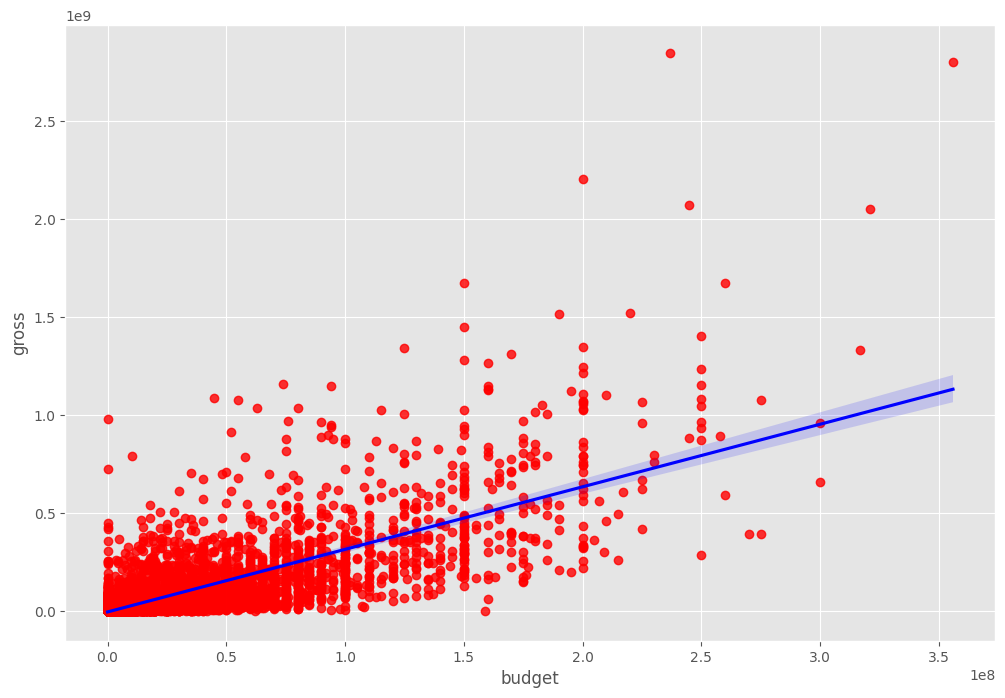

In [ ]:
#for better visualization
#plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [ ]:
#correclation:to bring out the numeric values only
df.corr(numeric_only=True)
#pearson,kendall,spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


In [ ]:
#filter column with integer and float values and exclude non-numeric values
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr(method='pearson')#pearson,kendall,spearman
print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222427  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222427  0.409182  1.000000  0.486931  0.632870  0.309122
budget   0.309212  0.055665  0.486931  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632870  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309122  0.269510  0.245235  1.000000


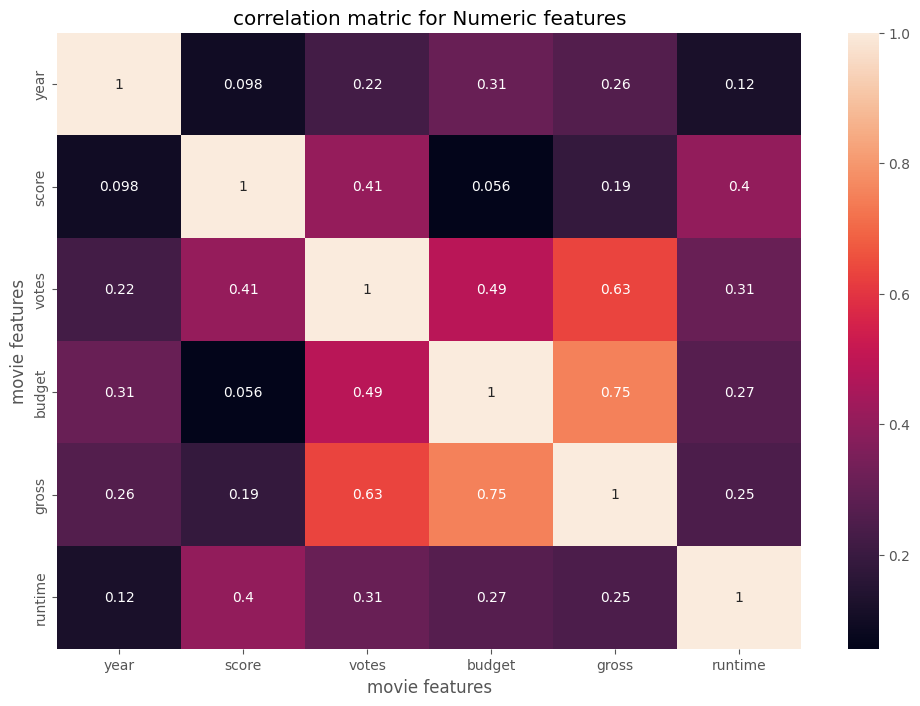

In [ ]:
correllation_matrix= numeric_df.corr(method='pearson')

sns.heatmap(correllation_matrix,annot=True)

plt.title('correlation matric for Numeric features')

plt.xlabel('movie features')

plt.ylabel('movie features')

plt.show()

In [ ]:
#to convert all object category column type to numerical type
df_numerized =df

for col_name in df_numerized.columns:
   if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name]= df_numerized[col_name].astype('category')
    df_numerized[col_name]= df_numerized[col_name].cat.codes

    df_numerized

In [ ]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124.0,0


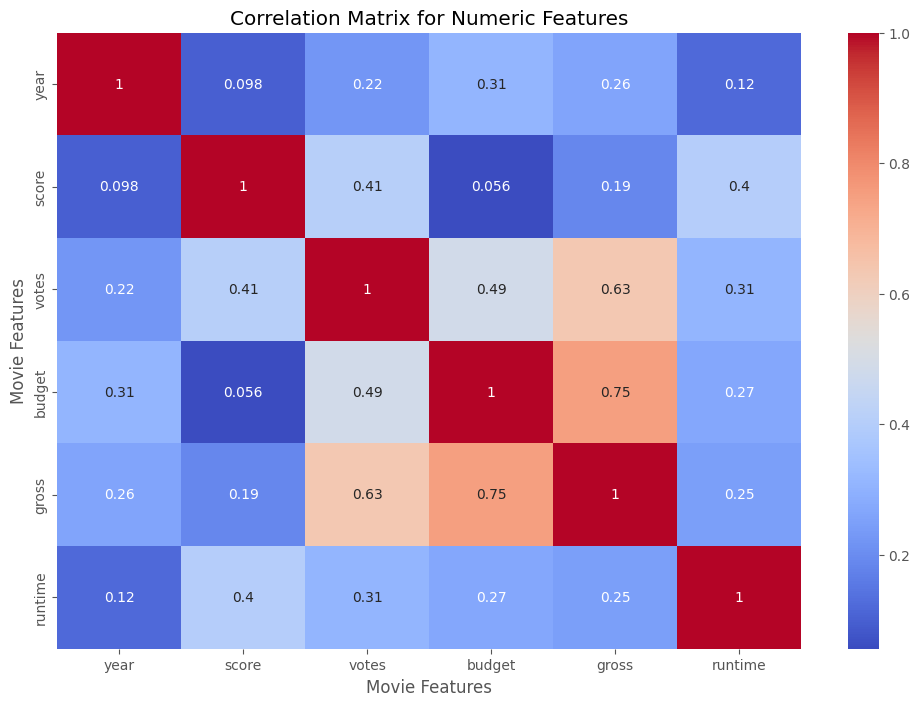

In [ ]:

numeric_df = df_numerized.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [ ]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.106295
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.309122,0.217782
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027606


In [ ]:
#correlation matrix
correlation_mat =df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
             budget        -0.081939
             gross         -0.095450
             company       -0.032943
             runtime        0.062145
             yearcorrect    0.006403
genre        name           0.016355
             rating         0.072423
             genre          1.000000
             year          -0.081261
             released       0.029822
             score          0.027965
             votes         -0.145296
             director      -0.015258
             writer         0.006567
             star          -0.005477
             country       -0.037615
             budget        -0.334021
             gross         -0.234297
             company       -0.071067
             runtime       -0.052711
             yearcorrect   -0.078210
year         name           0.011453
             rating         0.008779
             genre         -0.081261
             year           1.000000
             released      -0.000695
             score          0.097995
             votes          0.222427
             director      -0.020795
             writer        -0.008656
             star          -0.027242
             country       -0.070938
             budget         0.309212
             gross          0.261900
             company       -0.010431
             runtime        0.120811
             yearcorrect    0.996397
released     name          -0.011311
             rating         0.016613
             genre          0.029822
             year          -0.000695
             released       1.000000
             score          0.042788
             votes          0.015878
             director      -0.001478
             writer        -0.002404
             star           0.015777
             country       -0.020427
             budget         0.009145
             gross          0.000519
             company       -0.010474
             runtime        0.000868
             yearcorrect   -0.003775
score        name           0.017097
             rating        -0.001314
             genre          0.027965
             year           0.097995
             released       0.042788
             score          1.000000
             votes          0.409182
             director       0.009559
             writer         0.019416
             star          -0.001609
             country       -0.133348
             budget         0.055665
             gross          0.186392
             company        0.001030
             runtime        0.399451
             yearcorrect    0.106295
votes        name           0.013038
             rating         0.033743
             genre         -0.145296
             year           0.222427
             released       0.015878
             score          0.409182
             votes          1.000000
             director       0.000349
             writer         0.001127
             star          -0.019146
             country        0.073525
             budget         0.486931
    

In [ ]:
sorted_pairs =corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
             votes         -0.145296
votes        genre         -0.145296
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.095450
rating       gross         -0.095450
             budget        -0.081939
budget       rating        -0.081939
year         genre         -0.081261
genre        year          -0.081261
yearcorrect  country       -0.079009
country      yearcorrect   -0.079009
             runtime       -0.078412
runtime      country       -0.078412
yearcorrect  genre         -0.078210
genre        yearcorrect   -0.078210
             company       -0.071067
company      genre         -0.071067
country      year          -0.070938
year         country       -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
country      genre         -0.037615
genre        country       -0.037615
rating       company       -0.032943
company      rating        -0.032943
star         yearcorrect   -0.027606
yearcorrect  star          -0.027606
star         year          -0.027242
year         star          -0.027242
budget       writer        -0.025911
writer       budget        -0.025911
             gross         -0.022997
gross        writer        -0.022997
year         director      -0.020795
director     year          -0.020795
released     country       -0.020427
country      released      -0.020427
yearcorrect  director      -0.020385
director     yearcorrect   -0.020385
star         budget        -0.019952
budget       star          -0.019952
votes        star          -0.019146
star         votes         -0.019146
genre        director      -0.015258
director     genre         -0.015258
gross        director      -0.014916
director     gross         -0.014916
company      yearcorrect   -0.014144
yearcorrect  company       -0.014144
country      star          -0.012998
star         country       -0.012998
name         released      -0.011311
released     name          -0.011311
name         country       -0.010737
country      name          -0.010737
company      released      -0.010474
released     company       -0.010474
year         company       -0.010431
company      year          -0.010431
writer       year          -0.008656
year         writer        -0.008656
yearcorrect  writer        -0.008391
writer       yearcorrect   -0.008391
name         rating        -0.008069
rating       name          -0.008069
             writer        -0.005921
writer       rating        -0.005921
star         genre         -0.005477
genre        star          -0.005477
released     yearcorrect   -0.003775
yearcorrect  released      -0.003775
runtime      writer        -0.003511
writer       runtime       -0.003511
             released      -0.002404
released     writer        -0.002404
score        star          -0.001609
star         score         -0.001609
released     director      -0.001478
director     released      -0.001478
rating       score         -0.001314
score        rating        -0.001314
gross        star          -0.001129
star         gross         -0.001129
released     year          -0.000695
year         released      -0.000695
director     votes          0.000349
votes        director       0.000349
gross        released       0.000519
released     gross          0.000519
             runtime        0.000868
runtime      released       0.000868
company      score          0.001030
score        company        0.001030
votes        writer         0.001127
writer       votes          0.001127
company      director       0.004404
director     company        0.004404
             budget         0.004976
budget       director       0.004976
writer       company        0.005646
company      writer         0.005646
yearcorrect  rating         0.006403
rating       yearcorrect    0.006403
name

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) >0.5]
high_corr

,,0
gross,votes,0.632870
votes,gross,0.632870
gross,budget,0.750157
budget,gross,0.750157
year,yearcorrect,0.996397
yearcorrect,year,0.996397
director,director,1.000000
votes,votes,1.000000
released,released,1.000000
score,score,1.000000
